# Load libraries

In [35]:
## r plot graph idea gallery : https://www.r-graph-gallery.com/71-split-screen-with-par-mfrow.html
###  r plot master visualization: https://r4ds.had.co.nz/exploratory-data-analysis.html

library(dplyr)
library(magrittr)
library(knitr)
library(ggplot2)
library(corrplot) 
library(dplyr)
library(RColorBrewer)
# library(gridBase)
## Loading required package: grid
# library(ElemStatLearn)
# library(foreign)
# library(tree)
library(rpart)
# library(maptree)
# library(ROCR)

In [2]:
#load the rda file
data <- load(file = "data.Rda")

# 2. DATA EXPLORATION

In [3]:
head(data)

[1] "emailDFrp"

In [4]:
head(emailDFrp)

,isSpam,isRe,underscore,priority,isInReplyTo,sortedRec,subPunc,multipartText,hasImages,isPGPsigned,...,subQuesCt,numAtt,numRec,perCaps,hour,perHTML,subBlanks,forwards,avgWordLen,numDlr
./Unit6//messages/easy_ham1,F,T,F,F,T,T,F,F,F,F,...,0,0,2,4.451039,11,0,12.50000,0.000000,4.376623,3
./Unit6//messages/easy_ham2,F,F,F,F,F,T,F,F,F,F,...,0,0,1,7.491289,11,0,8.00000,0.000000,4.555556,0
./Unit6//messages/easy_ham3,F,F,F,F,F,T,F,F,F,F,...,0,0,1,7.436096,12,0,8.00000,0.000000,4.817164,0
./Unit6//messages/easy_ham4,F,F,F,F,F,T,F,F,F,F,...,0,0,0,5.090909,13,0,18.91892,3.125000,4.714286,0
./Unit6//messages/easy_ham5,F,T,F,F,F,T,F,F,F,F,...,0,0,1,6.116643,13,0,15.21739,6.451613,4.234940,0
./Unit6//messages/easy_ham6,F,T,F,F,T,T,F,F,F,F,...,0,0,1,7.625272,13,0,15.21739,12.000000,3.956897,0


In [5]:
summary(emailDFrp)

 isSpam   isRe     underscore priority isInReplyTo sortedRec subPunc 
 F:6951   F:6343   F:9222     F:9294   F:6556      F: 948    F:9085  
 T:2397   T:3005   T: 126     T:  54   T:2792      T:8400    T: 263  
                                                                     
                                                                     
                                                                     
                                                                     
                                                                     
 multipartText hasImages isPGPsigned subSpamWords  noHost     numEnd  
 F:9020        F:9326    F:9172      F   :8697    F   :9318   F:8209  
 T: 328        T:  22    T: 176      T   : 644    T   :  29   T:1139  
                                     NA's:   7    NA's:   1           
                                                                      
                                                                      
              

In [6]:
dim(emailDFrp)

[1] 9348   30

In [7]:
colnames(emailDFrp)

[1] "isSpam"        "isRe"          "underscore"    "priority"     
 [5] "isInReplyTo"   "sortedRec"     "subPunc"       "multipartText"
 [9] "hasImages"     "isPGPsigned"   "subSpamWords"  "noHost"       
[13] "numEnd"        "isYelling"     "isOrigMsg"     "isDear"       
[17] "isWrote"       "numLines"      "bodyCharCt"    "subExcCt"     
[21] "subQuesCt"     "numAtt"        "numRec"        "perCaps"      
[25] "hour"          "perHTML"       "subBlanks"     "forwards"     
[29] "avgWordLen"    "numDlr"

In [8]:
str(emailDFrp)

'data.frame':	9348 obs. of  30 variables:
 $ isSpam       : Factor w/ 2 levels "F","T": 1 1 1 1 1 1 1 1 1 1 ...
 $ isRe         : Factor w/ 2 levels "F","T": 2 1 1 1 2 2 1 2 1 2 ...
 $ underscore   : Factor w/ 2 levels "F","T": 1 1 1 1 1 1 1 1 1 1 ...
 $ priority     : Factor w/ 2 levels "F","T": 1 1 1 1 1 1 1 1 1 1 ...
 $ isInReplyTo  : Factor w/ 2 levels "F","T": 2 1 1 1 1 2 1 1 1 2 ...
 $ sortedRec    : Factor w/ 2 levels "F","T": 2 2 2 2 2 2 2 2 2 2 ...
 $ subPunc      : Factor w/ 2 levels "F","T": 1 1 1 1 1 1 1 1 1 1 ...
 $ multipartText: Factor w/ 2 levels "F","T": 1 1 1 1 1 1 1 1 1 1 ...
 $ hasImages    : Factor w/ 2 levels "F","T": 1 1 1 1 1 1 1 1 1 1 ...
 $ isPGPsigned  : Factor w/ 2 levels "F","T": 1 1 1 1 1 1 1 1 1 1 ...
 $ subSpamWords : Factor w/ 2 levels "F","T": 1 1 1 1 1 1 1 1 1 1 ...
 $ noHost       : Factor w/ 2 levels "F","T": 1 1 1 1 1 1 1 1 1 1 ...
 $ numEnd       : Factor w/ 2 levels "F","T": 1 1 1 1 1 1 1 1 1 1 ...
 $ isYelling    : Factor w/ 2 levels "F","T": 1 

Find number of missing values/check ranges


In [9]:
print(paste0("number of missing value: ", sum(is.na(emailDFrp))))

[1] "number of missing value: 357"


 # plot every variable with  ispam to see which variable has a bigger impact on isspam, plot a relationship between cat variabe

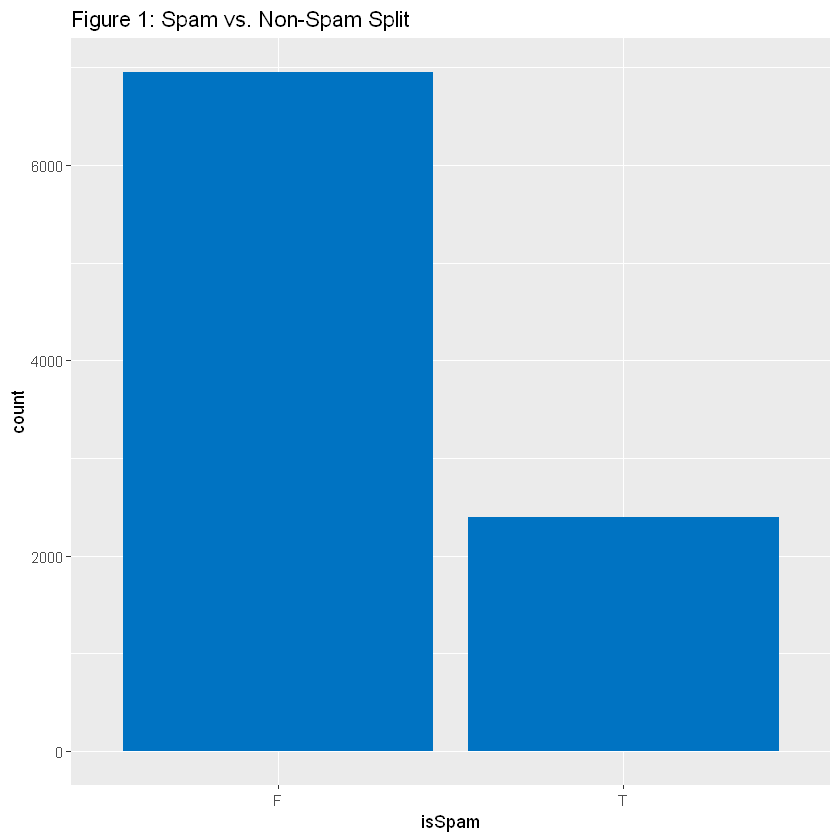

In [36]:
ggplot(emailDFrp, aes(x=isSpam)) +
  geom_bar(fill = "#0073C2FF")+
  ggtitle("Figure 1: Spam vs. Non-Spam Split")

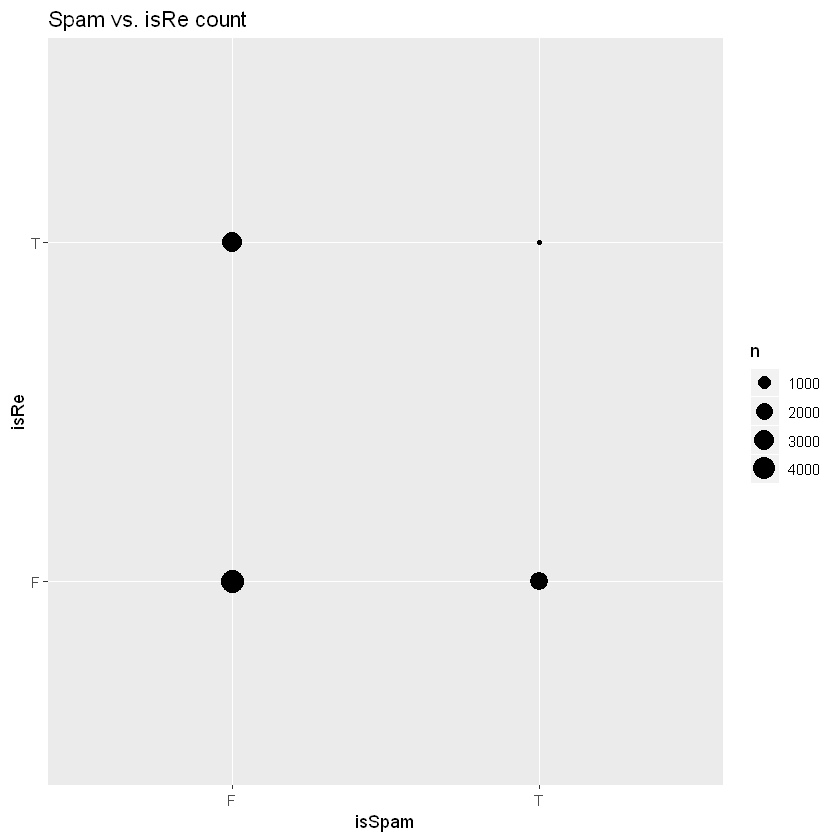

In [38]:
#### plot relationship with predictor and other categorical variable
ggplot(data = emailDFrp) +
  geom_count(mapping = aes(x = isSpam, y = isRe))+
  ggtitle("Spam vs. isRe count")

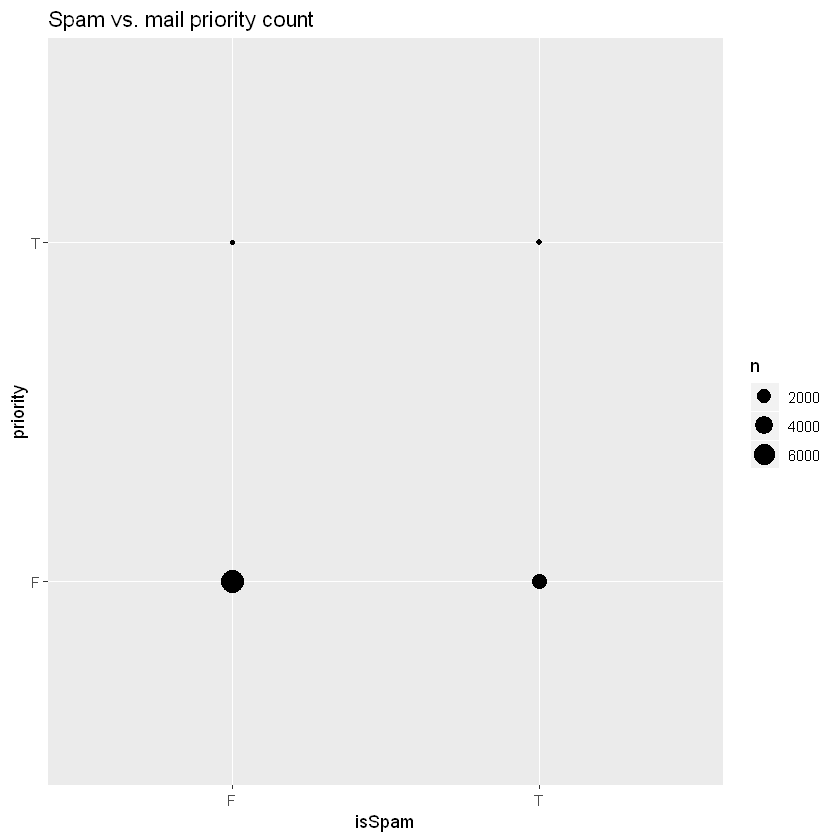

In [39]:
#### plot relationship with predictor and other categorical variable
ggplot(data = emailDFrp) +
  geom_count(mapping = aes(x = isSpam, y = priority))+
  ggtitle("Spam vs. mail priority count")

In [49]:
# Count Observations by Two Groups
emailDFrp  %>%
  count("priority", "isSpam")

ERROR: Error in Summary.factor(structure(c(1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, : 'sum' not meaningful for factors


In [44]:
emailDFrp %>% 
  count(isRe, isSpam) %>%  
  ggplot(mapping = aes(x = isRe, y = isSpam)) +
    geom_tile(mapping = aes(fill = n))

ERROR: Error in layer(data = data, mapping = mapping, stat = stat, geom = GeomPoint, : object 'isSpam' not found


In [53]:
ggplot(data = emailDFrp) +
  geom_histogram(mapping = aes(x = bodyCharCt, binwidth = 0.5)

ERROR: Error in parse(text = x, srcfile = src): <text>:3:0: unexpected end of input
1: ggplot(data = emailDFrp) +
2:   geom_histogram(mapping = aes(x = bodyCharCt, binwidth = 0.5)
  ^


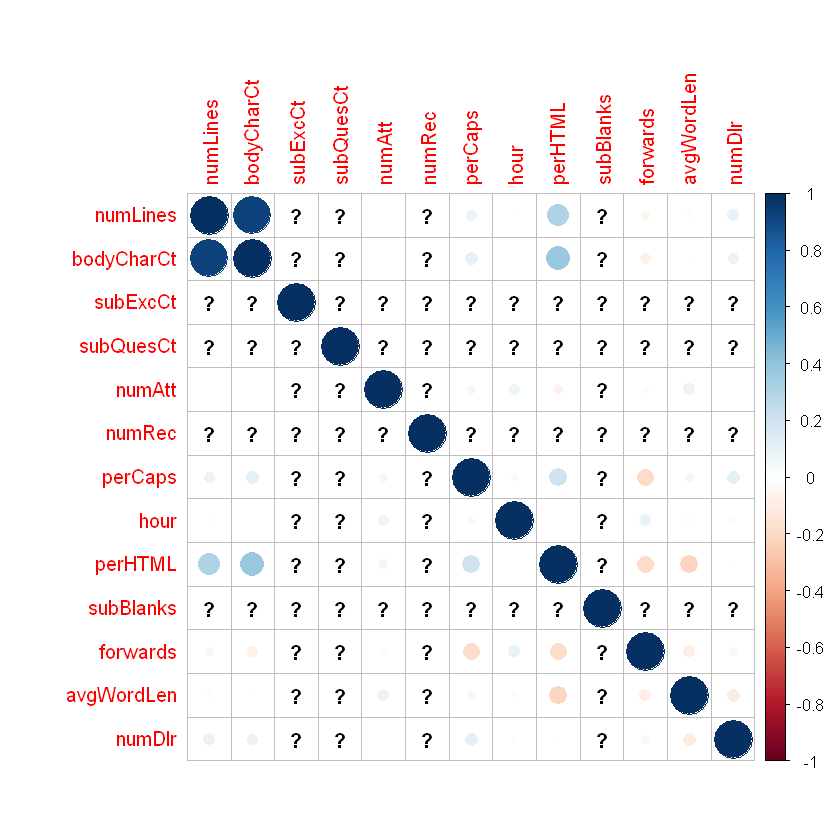

In [22]:
###############################
# #dot correlation
data_num <- select_if(emailDFrp , is.numeric)   
correlations <- cor(select_if(emailDFrp , is.numeric))
corrplot(correlations, method="circle")